## Fourier Series - Semana 02

- Sandra Arce Mena
- Angela María Cubillos Garay

In [49]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import scipy as sp
from scipy import integrate

## Presentación de funciones

    
$$f(t) = 2\sum_{n=1}^{\infty}\dfrac{(-1)^{n-1}}{n}sin(nt)$$


In [50]:
#Punto 1.2 Representación de Funciones

def f(x,n):
    
    f = 2*(((-1)**(n-1))*(np.sin(n*x)))/n
    
    return f

In [51]:
L = np.pi

cicles = 3

x = np.linspace(0,2*cicles*L,1000)

In [52]:
n = 1

nt = 50

F = 0

In [53]:
fig = plt.figure(figsize=(6,6))

camera = Camera(fig)

<Figure size 432x288 with 0 Axes>

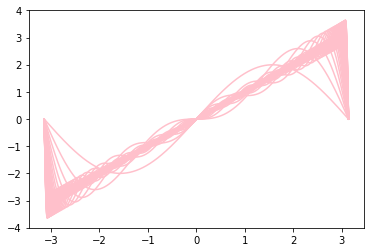

In [54]:
while n < nt:
    
    F += f(x,n)
    
    plt.plot(x,F,c='pink')
    
    camera.snap()
    
    n += 1 

In [55]:
animation=camera.animate()

animation.save('Fourier.mp4')

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


## Función $\zeta(s)$ de Riemann

In [ ]:
# 1.3 Función de Riemann

def f_rie(t):
    
    f_rie = (1/np.pi)*((t/12)*(t**2-np.pi**2))**2
    
    return f_rie

est,err = integrate.quad(lambda t: f_rie(t), -np.pi,np.pi)

print("El valor de la función evaluado en 6 es {}".format(est))

## Derivada espectral

$f(x) = e^{-0.1x}sin(x) $

In [71]:
def Second_Function(x):
    return np.exp(-0.1*x)*np.sin(x)

In [72]:
def Analytical_derivative(x):
    return -0.1*np.exp(-0.1*x)*np.sin(x)+np.cos(x)*np.exp(-0.1*x)

In [73]:
def Right_derivative(x):
    return (Second_Function(x)-Second_Function(x-0.1))/0.1

In [74]:
x = np.linspace(-2*np.pi,2*np.pi,100)

In [75]:
X=np.fft.fft(Second_Function(x))
Analytical = Analytical_derivative(x)

In [76]:
ffta = np.abs(X)
freq = np.fft.fftfreq(np.size(x),np.max(Analytical)/100)
X*=1j*freq
Espectral = np.fft.ifft(X)

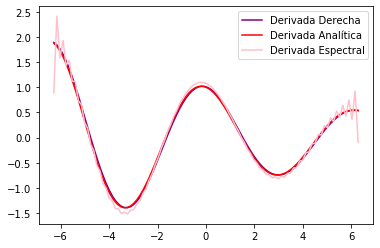

<Figure size 432x288 with 0 Axes>

In [77]:
plt.figure()
plt.plot(x,Right_derivative(x),color='purple',label='Derivada Derecha')
plt.plot(x,Analytical_derivative(x),color='red',label='Derivada Analítica')
plt.plot(x,np.real(Espectral),color='pink',label='Derivada Espectral')
plt.legend()
plt.show()
plt.savefig('Derivada Espectral.png')

## Manchas Solares

In [ ]:
file = np.loadtxt("ManchasSolares.txt")

In [ ]:
file = file[:,0] >= 1900

file = file[file]

fech = file[:,0] + file[:,1]/12

spot = file[:,3]

In [ ]:
mean = np.mean(spot)

spots = spot - media

In [ ]:
fft = np.fft.fft(spots)

freq = np.fft.fftfreq(len(spots),1)

mask = freq < 0

fft[mask] = 0

ffta = np.abs(fft)


In [ ]:
maxind = np.argmax(ffta)

fre2 = freq[maxind]

peri = (1/fre2)/12

In [ ]:
mask2 = freq! = fre2

fft[mask2] = 0

inv = np.fft.ifft(2*fft)

In [ ]:
plt.figure()

plt.title("Periodo {:.2f} en años".format(periodo))

plt.plot(fech, spots+mean, label="Datos")

plt.plot(fech, np.real(inv)+mean, c="r", label= "Frecuencia dominante")



plt.xlabel("Frecuencia [1/mes]")

plt.ylabel("Norma FFT")

plt.legend()

plt.savefig("manchasSolares.png")

plt.show()